#### Take a binary image & perform Boundary Extraction using morphological operation

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
original_image = cv2.imread('./images/finger_print.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

shape of the original image: (269, 221)


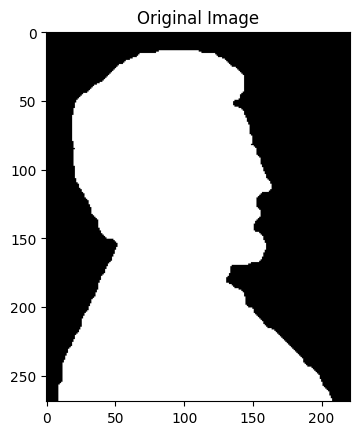

min pixel intensity: 0
max pixel intensity: 255


In [4]:
original_image = cv2.imread('./images/Lincoln.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Erosion Function 

In [5]:
def erosion(input_image, st_element):
    output_image = input_image.copy()
    st_element = st_element*255
    
    #calculte padding offset
    st_offset = st_element.shape[0]//2
    image_height, image_width = input_image.shape
    
    #iterate over every pixel in the image
    for row in range(image_height):
        for col in range(image_width):
            is_fit = True
            
            #iterate over the structuring element
            for dx in range(-st_offset, st_offset+1):
                for dy in range(-st_offset, st_offset+1):
                    st_row = dx + st_offset
                    st_col = dy + st_offset
                    
                    #calculate image pixel location 
                    img_row = row + dx
                    img_col = col + dy
                    
                    #check if the position is inside image boundaries
                    if 0<=img_row<image_height and 0<=img_col<image_width:
                        if st_element[st_row, st_col] == 255 and input_image[img_row, img_col] != 255:
                            is_fit = False
                    #If the structuring element expects foreground but we're outside the image  
                    elif st_element[st_row, st_col] == 255:
                        is_fit = False
            output_image[row][col] = 255 if is_fit else 0
    
    return np.uint8(output_image)                    
                          
                             

### Functon for Boundary Extraction 

In [6]:
def extract_boundary(image, st_element):
    eroded_image = erosion(image.copy(), st_element)
    return image - eroded_image

### Apply Boundary Extracton 

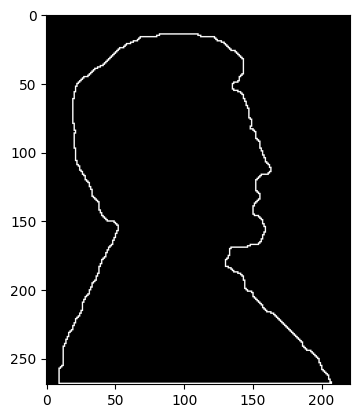

In [7]:
st_element = np.ones((3,3))
extracted_image = extract_boundary(original_image, st_element)
plt.imshow(extracted_image, cmap='gray')
plt.show()
